In [268]:
import pandas as pd
from Restaurant.util.util import columns_removal

test_file_path = r"D:\Restaurant_Rating_Prediction\Restaurant\artifact\data_ingestion\2022-08-31-11-28-54\ingested_data\test\zomato.csv"

test_df = pd.read_csv(test_file_path)

In [269]:
test_df.head(2)

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Rate
0,Kshera Sagar,No,No,0,Koramangala 1st Block,Quick Bites,NaN,"North Indian, Chinese",200,Dine-out,Koramangala 5th Block,3.9
1,Melt - Eden Park,Yes,Yes,347,JP Nagar,Casual Dining,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood","1,000",Buffet,JP Nagar,4.0


In [270]:
columns = ['name','location','rest_type','listed_in(type)','listed_in(city)']

test_df = columns_removal(columns=columns,df=test_df)

In [271]:
test_df.head(3)

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,No,No,0,NaN,"North Indian, Chinese",200,3.9
1,Yes,Yes,347,"Tandoori Chicken, Biryani, Paneer Tikka, Chick...","North Indian, Chinese, Thai, Mughlai, Seafood","1,000",4.0
2,No,No,9,NaN,"South Indian, Chinese",400,3.4


In [272]:
def cat_change(value):
    try:
        if value == 'No':
            return 0
        else:
            return 1
    except Exception as e:
        print(str(e))

In [273]:
from Restaurant.util.util import count

test_df['dish_liked'] = test_df['dish_liked'].apply(count)
test_df['cuisines'] = test_df['cuisines'].apply(count)

test_df['online_order'] = test_df['online_order'].apply(cat_change)
test_df['book_table'] = test_df['book_table'].apply(cat_change)

In [274]:
test_df['approx_cost(for two people)'] = test_df['approx_cost(for two people)'].str.replace(",","")
test_df['approx_cost(for two people)'] = pd.to_numeric(test_df['approx_cost(for two people)'])

In [275]:
test_df.head(3)

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,0,0,0,0,2,200.0,3.9
1,1,1,347,7,5,1000.0,4.0
2,0,0,9,0,2,400.0,3.4


In [276]:
from operator import index
from textwrap import indent
import numpy as np

for column in test_df.columns:
    #outliers = []
    print(test_df.shape)
    Q1,Q3 = np.percentile(test_df[column],[25,75])
    IQR = Q3-Q1
    upper_fence = np.where(test_df[column]>=(Q3+1.5*IQR))
    #outliers.append(upper_fence)
    print(upper_fence)
    lower_fence = np.where(test_df[column]<=(Q3-1.5*IQR))
    print(lower_fence)
for i in upper_fence[0]:
    if i in test_df.index.values:
        test_df.drop(index=i,inplace=True)
    if i in test_df.index.values:
        test_df.drop(index=i,inplace=True)
        print(test_df.shape)
    



(10344, 7)
(array([], dtype=int64),)
(array([], dtype=int64),)
(10344, 7)
(array([    0,     1,     2, ..., 10341, 10342, 10343], dtype=int64),)
(array([    0,     2,     3, ..., 10341, 10342, 10343], dtype=int64),)
(10344, 7)
(array([    5,    16,    20, ..., 10333, 10337, 10343], dtype=int64),)
(array([], dtype=int64),)
(10344, 7)
(array([], dtype=int64),)
(array([], dtype=int64),)
(10344, 7)
(array([    1,    16,    56,    60,    83,    84,    96,   134,   142,
         176,   195,   226,   241,   264,   276,   285,   320,   354,
         359,   370,   380,   383,   400,   409,   410,   430,   434,
         471,   476,   478,   495,   505,   516,   518,   522,   535,
         544,   546,   560,   567,   598,   604,   607,   615,   620,
         633,   652,   661,   669,   670,   674,   676,   691,   694,
         706,   709,   710,   720,   743,   762,   803,   808,   812,
         817,   847,   849,   865,   866,   944,   993,  1027,  1030,
        1032,  1044,  1052,  1082,  1097,

In [315]:
def cap_data(df):
    for col in df.columns:
        print("capping the ",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            percentiles = df[col].quantile([0.01,0.99]).values
            df[col][df[col] <= percentiles[0]] = percentiles[0]
            df[col][df[col] >= percentiles[1]] = percentiles[1]
        else:
            df[col]=df[col]
    return df

final_df=cap_data(test_df)
final_df.head()

capping the  online_order
capping the  book_table
capping the  votes
capping the  dish_liked
capping the  cuisines
capping the  approx_cost(for two people)
capping the  Rate


d:\Restaurant_Rating_Prediction\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\Restaurant_Rating_Prediction\venv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
d:\Restaurant_Rating_Prediction\venv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\Restaurant_Rating_Prediction\venv\lib\site-pa

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,0,0,0.0,2,2,200.0,3.9
1,1,1,347.0,7,5,1000.0,4.0
2,0,0,9.0,2,2,400.0,3.4
3,1,0,33.0,2,2,200.0,3.9
4,1,0,142.0,7,3,450.0,3.1


{'whiskers': [<matplotlib.lines.Line2D at 0x1aef3ebfc50>,
 'caps': [<matplotlib.lines.Line2D at 0x1aef3e8ec50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aef3ebf940>],
 'medians': [<matplotlib.lines.Line2D at 0x1aef3ece710>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aef3ece9e8>],
 'means': []}

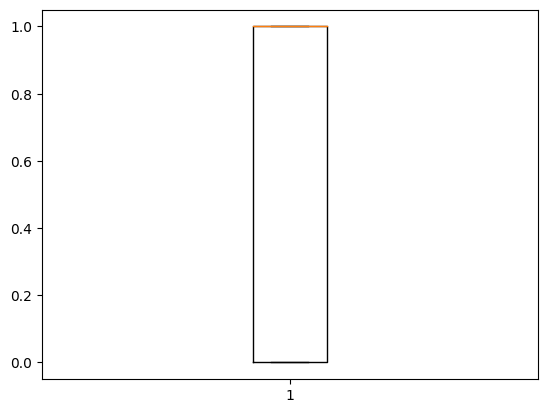

In [316]:
import matplotlib.pyplot as plt

plt.boxplot(final_df['online_order'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aed18c7c88>,
 'caps': [<matplotlib.lines.Line2D at 0x1aed1914e10>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aed1914630>],
 'medians': [<matplotlib.lines.Line2D at 0x1aed1923400>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aed19236d8>],
 'means': []}

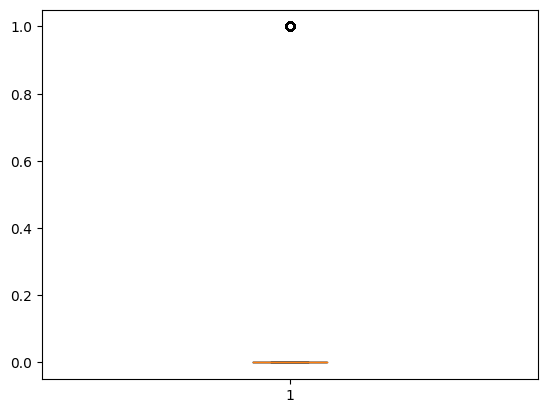

In [78]:
plt.boxplot(test_df['book_table'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aed0c05b38>,
 'caps': [<matplotlib.lines.Line2D at 0x1aed0c23518>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aed0c13cf8>],
 'medians': [<matplotlib.lines.Line2D at 0x1aed0c23ac8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aed0c23da0>],
 'means': []}

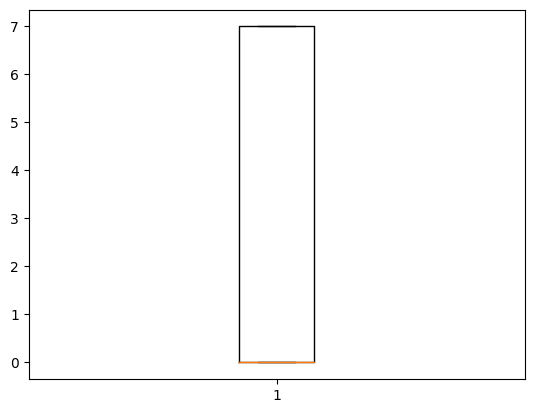

In [16]:
plt.boxplot(test_df['dish_liked'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1aef3eedf60>,
 'caps': [<matplotlib.lines.Line2D at 0x1aef40417f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1aef406ca58>],
 'medians': [<matplotlib.lines.Line2D at 0x1aef3efa828>],
 'fliers': [<matplotlib.lines.Line2D at 0x1aef3efab00>],
 'means': []}

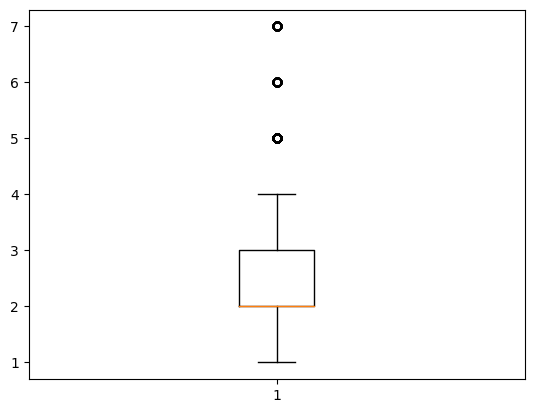

In [317]:
plt.boxplot(final_df['cuisines'])

In [80]:
test_df.quantile([0.01,0.99])

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0.01,0.0,0.0,0.0000,0.0,1.0,100.0,2.6
0.99,1.0,1.0,4012.8948,7.0,7.0,2400.0,4.6


In [81]:
test_df.quantile([0.25,0.75])

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0.25,0.0,0.0,7.0,0.0,2.0,300.0,3.5
0.75,1.0,0.0,205.0,7.0,3.0,700.0,3.9


In [84]:
test_df.quantile([0.50])

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0.5,1.0,0.0,42.0,0.0,2.0,400.0,3.9


(array([8675.,  740.,  291.,  157.,  117.,  102.,   47.,   53.,   25.,
         137.]),
 array([   0.   ,  402.564,  805.128, 1207.692, 1610.256, 2012.82 ,
        2415.384, 2817.948, 3220.512, 3623.076, 4025.64 ]),
 <BarContainer object of 10 artists>)

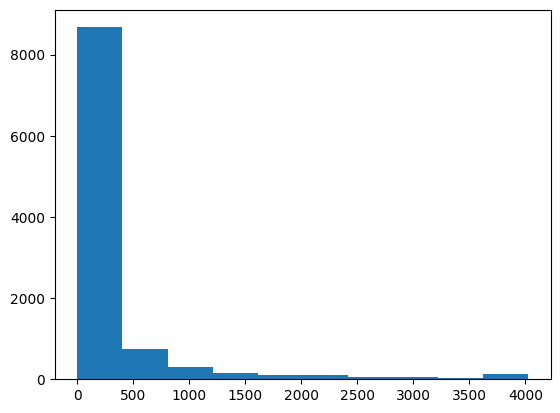

In [87]:
plt.hist(test_df['votes'])

In [115]:
from statistics import median

median_ = test_df[['approx_cost(for two people)']].median(skipna=True)
median_[0]

400.0

In [175]:
def fill_na(value,median_):
    try:
        if type(value) == float:
            value = str(value)
        if value == "nan":
            return float(median_)
        else:
            return float(value)
    except Exception as e:
        print(str(e))

In [176]:
test_df['approx_cost(for two people)']=test_df['approx_cost(for two people)'].apply(fill_na,args = (median_[0],))

In [177]:
test_df['approx_cost(for two people)'].isnull().sum()

0

In [144]:
test_df.dtypes

online_order                     int64
book_table                       int64
votes                          float64
dish_liked                       int64
cuisines                         int64
approx_cost(for two people)    float64
Rate                           float64
dtype: object

In [152]:
i = 0
if test_df.loc[0:10343] == upper_fence[0][0]

array([    0,     1,     2, ..., 10341, 10342, 10343], dtype=int64)

In [185]:
test_df.head(2)

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,0,0,0,0,2,200.0,3.9
1,1,1,347,7,5,1000.0,4.0


In [186]:
upper_fence[0].max()

10343

In [191]:
upper_fence[0].min()

0

In [205]:
a = test_df.index.values

In [208]:
a

array([    0,     1,     2, ..., 10341, 10342, 10343], dtype=int64)

In [280]:
test_df.head()

,online_order,book_table,votes,dish_liked,cuisines,approx_cost(for two people),Rate
0,0,0,0.0,0,2,200.0,3.9
1,1,1,347.0,7,5,1000.0,4.0
2,0,0,9.0,0,2,400.0,3.4
3,1,0,33.0,0,2,200.0,3.9
4,1,0,142.0,7,3,450.0,3.1


(array([2466., 3518.,    0., 2370.,    0., 1148.,  349.,    0.,  111.,
         118.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

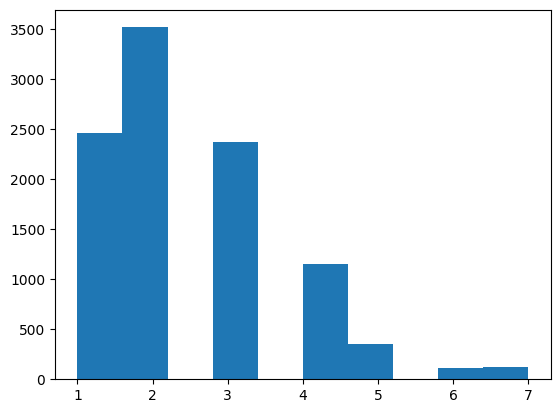

In [282]:
plt.hist(test_df['cuisines'])

(array([5532.,  375.,  421.,    0.,  369.,  314.,    0.,  271.,  252.,
        2546.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <BarContainer object of 10 artists>)

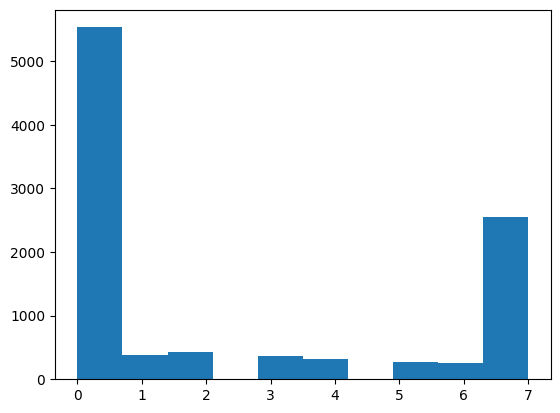

In [283]:
plt.hist(test_df['dish_liked'])

In [284]:
def fill(value,mode):
    try:
        if value == 0:
            return mode
        else:
            return value
    except Exception as e:
        print(str(e))

In [289]:
from statistics import mode,median,mean

mediann = round(mean(test_df['dish_liked']))

mediann

2

In [290]:
test_df['dish_liked'] = test_df['dish_liked'].apply(fill,args=(mediann,))

(array([ 375., 5953.,    0.,  369.,    0.,  314.,  271.,    0.,  252.,
        2546.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

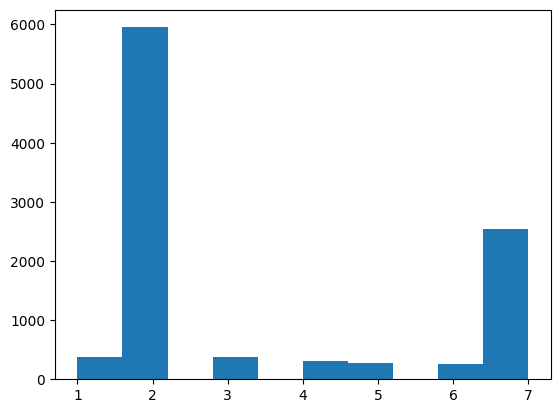

In [291]:
plt.hist(test_df['dish_liked'])

<BarContainer object of 10080 artists>

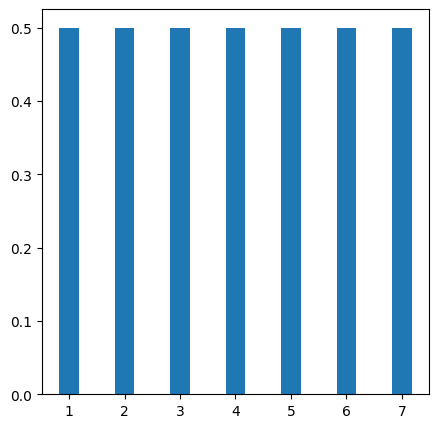

In [312]:
plt.figure(figsize=(5,5))
plt.bar(test_df['cuisines'],width=0.35,height=0.5)


In [320]:
mod = round(median(test_df['cuisines']))
type(mod)

int

In [297]:
test_df['cuisines'] = test_df['cuisines'].apply(fill,args=(mod,))

In [300]:
for i in test_df['cuisines']:
    if i == 0:
        print(i)

(array([3697., 2935., 1384.,  743.,  428.,  257.,  264.,   78.,   42.,
         186.]),
 array([ 100.,  310.,  520.,  730.,  940., 1150., 1360., 1570., 1780.,
        1990., 2200.]),
 <BarContainer object of 10 artists>)

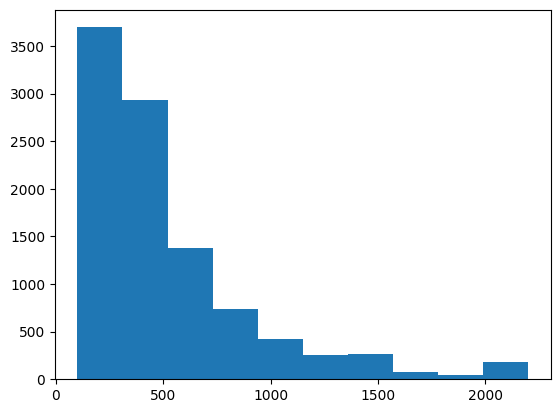

In [302]:
plt.hist(test_df['approx_cost(for two people)'])

In [313]:
test_df['approx_cost(for two people)'].median(skipna=True)


400.0

In [1]:
file_path = r'D:\Restaurant_Rating_Prediction\Restaurant\artifact\transformed_dir\2022-09-01-10-16-49\transformed_data\test\zomato.npz'
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
from Restaurant.util.util import load_numpy_array_data

data = load_numpy_array_data(file_path=file_path)

In [24]:
data[0:5,0]

array([-0.43342167,  0.15141149, -0.41825309, -0.37780354, -0.19409514])

In [12]:
file_path = r"D:\Restaurant_Rating_Prediction\Restaurant\artifact\data_ingestion\2022-09-03-19-08-43\ingested_data\test\zomato.csv"

from Restaurant.util.util import count
import pandas as pd

In [13]:
df = pd.read_csv(file_path)

In [14]:
df.head()

,name,online_order,book_table,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),Rate
0,Cafe 221B,Yes,Yes,49,BTM,Cafe,NaN,"Cafe, Beverages",300,Delivery,Koramangala 7th Block,3.700000
1,Shiv Sagar,Yes,No,0,Brigade Road,Food Court,NaN,"South Indian, Chinese, North Indian",250,Dine-out,Residency Road,3.700449
2,Food Springs,Yes,No,232,Jayanagar,Quick Bites,"Honey Chilli Potatoes, Nachos, Lemonade, Hakka...","South Indian, Chinese",400,Delivery,Banashankari,4.000000
3,Hot Brixx,Yes,No,22,Marathahalli,Quick Bites,NaN,"Italian, Pizza",500,Delivery,Marathahalli,3.700000
4,SKS Veg Corner,No,No,0,Hebbal,Quick Bites,NaN,South Indian,100,Dine-out,New BEL Road,3.700449


In [15]:
df['listed_in(type)'].unique()

array(['Delivery', 'Dine-out', 'Desserts', 'Cafes', 'Buffet',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [9]:
df['rest_type'].unique()

array(['Cafe', 'Food Court', 'Quick Bites', 'Bakery',
       'Takeaway, Delivery', 'Casual Dining', 'Dessert Parlor',
       'Delivery', 'Food Truck', nan, 'Pub, Casual Dining',
       'Cafe, Bakery', 'Fine Dining', 'Bar', 'Bar, Casual Dining', 'Pub',
       'Casual Dining, Cafe', 'Beverage Shop',
       'Quick Bites, Beverage Shop', 'Mess', 'Lounge',
       'Beverage Shop, Quick Bites', 'Dessert Parlor, Cafe', 'Dhaba',
       'Sweet Shop, Quick Bites', 'Fine Dining, Lounge',
       'Bakery, Quick Bites', 'Microbrewery', 'Quick Bites, Bakery',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop', 'Kiosk',
       'Microbrewery, Casual Dining', 'Quick Bites, Sweet Shop',
       'Dessert Parlor, Bakery', 'Lounge, Bar', 'Casual Dining, Pub',
       'Confectionery', 'Club', 'Dessert Parlor, Quick Bites',
       'Sweet Shop', 'Cafe, Casual Dining', 'Microbrewery, Pub',
       'Pub, Microbrewery', 'Quick Bites, Dessert Parlor',
       'Casual Dining, Microbrewery', 'Bakery, Cafe',
   

In [10]:
from Restaurant.util.util import count

df['rest_type'] = df['rest_type'].apply(count)

In [11]:
df['rest_type'].unique()

array([1, 2, 0], dtype=int64)

In [53]:
list1 = [value for value in df['rest_type'].value_counts().values]

In [54]:
list2 = [index for index in df['rest_type'].value_counts().index]

In [52]:
def counter(value):
    try:
        return 
    except Exception as e:
        print(str(e))

TypeError: dict expected at most 1 arguments, got 2

In [85]:
from collections import Counter

data = Counter(df['rest_type'])

In [76]:
a = [1,2,3,4,5,6,4,21,1,]

In [81]:
d = {}
sum = 0
for ele in a:
    if ele is ele:
        sum += 1
    d[ele] = sum
else:
    d[ele] = sum
        

Counter({'Cafe': 741,
         'Food Court': 123,
         'Quick Bites': 3833,
         'Bakery': 211,
         'Takeaway, Delivery': 403,
         'Casual Dining': 2092,
         'Dessert Parlor': 453,
         'Delivery': 510,
         'Food Truck': 19,
         nan: 43,
         'Pub, Casual Dining': 49,
         'Cafe, Bakery': 52,
         'Fine Dining': 65,
         'Bar': 151,
         'Bar, Casual Dining': 84,
         'Pub': 76,
         'Casual Dining, Cafe': 63,
         'Beverage Shop': 176,
         'Quick Bites, Beverage Shop': 19,
         'Mess': 60,
         'Lounge': 82,
         'Beverage Shop, Quick Bites': 68,
         'Dessert Parlor, Cafe': 41,
         'Dhaba': 8,
         'Sweet Shop, Quick Bites': 31,
         'Fine Dining, Lounge': 3,
         'Bakery, Quick Bites': 46,
         'Microbrewery': 7,
         'Quick Bites, Bakery': 15,
         'Casual Dining, Bar': 239,
         'Dessert Parlor, Beverage Shop': 11,
         'Kiosk': 32,
         'Microbrewery,

In [102]:
df['rest_type'] = df['rest_type'].apply(Counter.values())

TypeError: descriptor 'values' of 'dict' object needs an argument

In [105]:
a = [1,2,3,1,2,3]
d = {}
sum = 0
for ele in a:
    d[ele] = a.count(ele)



In [106]:
d
  

{1: 2, 2: 2, 3: 2}

In [107]:
df['rest_type'].count()

10301

In [1]:
import pandas as pd
file_path = r"D:\Restaurant_Rating_Prediction\Restaurant\artifact\data_ingestion\2022-09-05-14-02-27\ingested_data\test\zomato.csv"
df = pd.read_csv(file_path)

In [2]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10344 entries, 0 to 10343
Data columns (total 12 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         10344 non-null  object 
 1   online_order                 10344 non-null  object 
 2   book_table                   10344 non-null  object 
 3   votes                        10344 non-null  int64  
 4   location                     10340 non-null  object 
 5   rest_type                    10301 non-null  object 
 6   dish_liked                   4756 non-null   object 
 7   cuisines                     10335 non-null  object 
 8   approx_cost(for two people)  10282 non-null  object 
 9   listed_in(type)              10344 non-null  object 
 10  listed_in(city)              10344 non-null  object 
 11  Rate                         10344 non-null  float64
dtypes: float64(1), int64(1), object(10)
memory usage: 969.9+ KB


In [11]:
file_path = r"D:\Restaurant_Rating_Prediction\saved_models"

In [13]:
import os

folder_name = list(map(int, os.listdir(file_path)))
folder_name

ValueError: invalid literal for int() with base 10: '20220908-115430'

In [11]:
import os
from Restaurant.entity.config_entity import DataIngestionConfig

a = DataIngestionConfig

In [12]:
a.dataset_download_url

In [13]:
a.zip_download_dir

In [14]:
from Restaurant.entity.config_entity import DataValidationConfig
b = DataValidationConfig

In [16]:
c = b.schema_file_path